In [11]:
# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np

# Import the matplotlib library, package pyplot for plotting
import matplotlib.pyplot as plt

# Use magic function to render the figure in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

# Sets Generator type with a declared value of 100
rng = np.random.default_rng(100)

# Set number of samples based on number of births
n = 63739

### Age

A review of data provided by the NPRS study is used here to determine how maternal age is distributed across the population - mothers with live births in 2016 (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2017/Perinatal_Statistics_Report_2017.pdf).

While age is a numerical value it is presented by NPRS as a categorical variable/discrete groups, ranging from under 20 years of age to 45 years of age and older. The NPRS study provides the frequency and percentages of births within each group.

In [12]:
# Downloaded NPRS_Age.csv from CITE
age = pd.read_csv("Data/Age_and_Feeding_Type.csv", skiprows=1, index_col='Age Group')

# Other source: https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

# https://www.w3resource.com/pandas/dataframe/dataframe-t.php
age = age.T
age = age.iloc[0:4, 0:7]

age

Age Group,Under 20 Years,20-24 Years,25-29 Years,30-34 Years,35-39 Years,40-44 Years,45 Years and Over
Artificial,786,"3,158","5,409","8,284","6,458","1,380",94
Breast,250,"1,632","4,883","12,193","10,266","2,173",144
Combined,66,388,"1,099","2,470","2,004",548,54
Total,"1,102","5,178","11,391","22,947","18,728","4,101",292


An initial view of the NPRS data indicates that the data is somewhat normally distributed with births increasing in the 25 - 29 age group, peaking at 30 - 34 years of age and beginning to decline in the 35 - 39 age set.

AttributeError: 'int' object has no attribute 'plot'

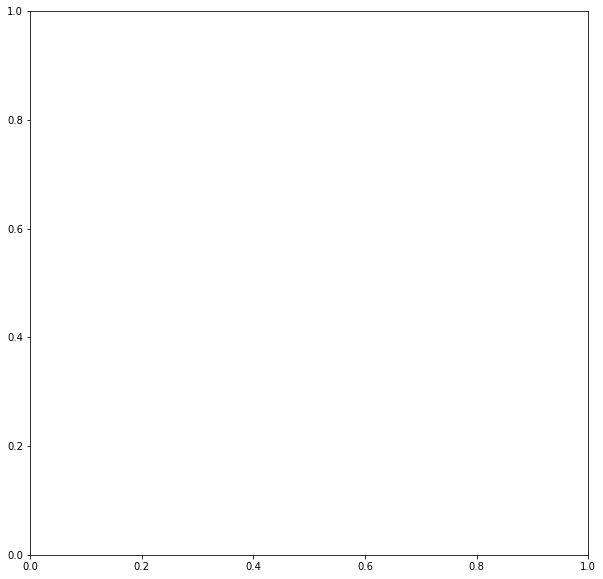

In [13]:
# https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
fig = plt.subplots(figsize=(10, 10))
ax = dpi=100

# Create the x position 
x_pos = np.arange(7)


ax.plot(x_pos, age.iloc[0, :], marker='^', label='Single')
ax.plot(x_pos, age.iloc[1, :], marker='^', label='Married')
ax.plot(x_pos, age.iloc[2, :], marker='^', label='Other')


ax.set_title('Maternal Age and Initial Feeding Type')
ax.set_xlabel('Maternal Age')
ax.set_ylabel('Initial Feeding Type Frequency')

# https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xticklabels-in-python/
ax.set_xticks(x_pos)
ax.set_xticklabels(data.columns, rotation=90)
ax.legend()

Visualising the data set supports this analysis.
It shows a minimum value of less than 20 years of age increasing in a positive direction until it significant peak around 32 years of age - the midpoint of the age group with the greatest frequency of births. 

This can be replicated using a Trinangualr Distribution. This generates a random number from a weighted range by distribuing events between the maximum and minimum values provided, based on a third value that indicates what the most likely outcome will be.[54] Here we are looking for 100 events (births) distributed between the ages of 16 and 50 with a known peak where the mothers age is 32.

Here is your triangular continuous random variable:
 [26 35 28 39 26 35 37 36 47 23 29 34 22 34 28 41 31 44 36 28 24 34 28 24
 36 27 36 29 32 34 41 30 39 37 34 27 27 32 34 31 31 38 40 32 27 32 27 29
 35 30 34 24 25 41 26 22 43 30 35 41 28 33 36 38 29 28 36 42 31 34 36 40
 24 29 34 29 34 27 36 31 36 33 38 30 42 23 44 41 42 27 32 22 46 28 31 29
 34 28 26 25]


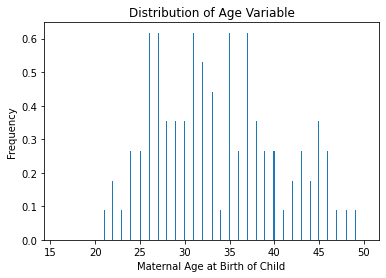

In [14]:
# Here we are looking for a random array with a lower limit of 16 an upper limit of 50
# and 32 being the number that appears most frequently (the mid point of the most frequent age group)
# over n number of instances where n is the total number of births
# and for the out to be presented on a Triangular Distribution plot

Tri_var = np.random.triangular(left = 20, mode = 30, right = 50, size = 100).astype(int)
print ("Here is your triangular continuous random variable:\n % s" % (Tri_var)) # [55]

#  https://stackoverflow.com/questions/60870070/a-weighted-version-of-random-randint
plt.hist(np.ma.round(np.random.triangular(left = 20, mode = 30, right = 50, size = 100)).astype(int),
        range = (16, 50), bins = 300, density = True)

plt.title('Distribution of Age Variable')
plt.xlabel('Maternal Age at Birth of Child')
plt.ylabel('Frequency')
plt.show()

### Civil Status

Univariate analysis by Gallagher shows that maternal marital status at the time of birth is significantly associated with breastfeeding initiation (Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668).

Data captured in the 2016 NPRS survey does not capture relational data between breastfeeding initiation and maternal marital status at the time of birth (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2016/Perinatal_Statistics_Report_2016.pdf). However it does provide percentage values for maternal marital status across all age groups:

| Maternal Civil Status at birth | Percentage of Total births |
|--------------------------------|----------------------------|
| Married                        | 62.2                       |
| Single                         | 36.4                       |
| Other                          | 1.4                        |


CSO data on civil status for 2016 does record information across all age groups (https://www.cso.ie/en/releasesandpublications/er/mcp/marriagesandcivilpartnerships2016/). However, as it only captures data for 
* Marriages
* Civil parnerships
* Divorces, Judicial Separation and Nullity applications received by the courts 
* Divorces, Judicial Separation and Nullity applications granted by the courts 

It does not capture other civil arrangements such as informal seperations or and co-habitants.

For the purposes of this simulation the NPRS data will be used.

This is a categorical variable that has 3 possible values
1. Married
2. Single
3. Other (encompassing all other civil statuses as indentified by the survey respondant)

In [15]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
civil_status = ['single', 'married', 'other']

# 
civil_status = rng.choice(civil_status, n, p=[0.22, 0.72, 0.06])

# https://stackoverflow.com/questions/42916330/efficiently-count-zero-elements-in-numpy-array/42916378
print("Single: ", np.count_nonzero(civil_status == 'single'))
print("Married: ", np.count_nonzero(civil_status == 'married'))
print("Other: ", np.count_nonzero(civil_status == 'other'))

Single:  14056
Married:  45799
Other:  3884


AttributeError: 'int' object has no attribute 'plot'

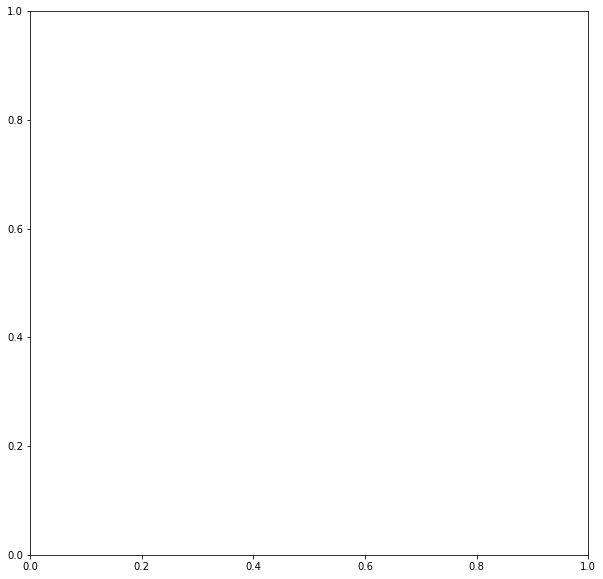

In [16]:
# https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
fig = plt.subplots(figsize=(10, 10))
ax = dpi=100

# Create the x position 
x_pos = np.arange(7)

ax.plot(x_pos, civil_status.loc['Single', :], marker='s', label='Single')
ax.plot(x_pos, civil_status.loc['Married', :], marker='s', label='Married')
ax.plot(x_pos, civil_status.loc['Other', :], marker='s', label='Other')

ax.set_title('Maternal Age and Marital_Status')
ax.set_xlabel('Age')
ax.set_ylabel('Marital Status - Frequency')

ax.set_xticks(x_pos)
ax.set_xticklabels(civil_status.columns, rotation=90)

ax.legend()

### Health Insurance Status

In [18]:
data = pd.read_csv('Insurance_by_Age.csv', index_col='Age')
data = data.T
data

FileNotFoundError: [Errno 2] File Insurance_by_Age.csv does not exist: 'Insurance_by_Age.csv'

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), dpi=100)
x_pos = np.arange(7)

y = data.iloc[1, :] / 100
y = y*data.iloc[0, :]
ax.plot(x_pos, y, marker='o', label='Insurance')
ax.set_title('Age_and_Feeding_Type')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Insurance')
ax.set_xticks(x_pos)
ax.set_xticklabels(data.columns, rotation=90)
ax.legend()

## Generate Data Set

### Age

In [41]:
# intialise data of lists.
data = {'Age Group':['Under 20', '20-24 Years', '25-29 Years', '30-34 Years',
                    '35-39 Years', '40-44 Years', '45 Years and Over'],
        'Age':[]}
 
# Create DataFrame with single column for Age
df = pd.DataFrame((np.random.triangular(left = 16, mode = 30, right = 50, size = 500)).astype(int), columns=['Maternal age at birth'])
 
# Print the output.
print(df)

     Maternal age at birth
0                       20
1                       34
2                       37
3                       33
4                       25
..                     ...
495                     40
496                     25
497                     38
498                     33
499                     44

[500 rows x 1 columns]


In [9]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
civil_status = ['single', 'married', 'other']
sim_status = rng.choice(civil_status, 500, p=[0.05, 0.39, 0.56])
df = pd.DataFrame(sim_status, columns = ['Civil Status'])

# Print the output.
print(df)

    Civil Status
0          other
1          other
2         single
3          other
4         single
..           ...
495        other
496       single
497        other
498        other
499        other

[500 rows x 1 columns]
